# Сustomer behavior analysis

The goal of this project is to support decision making for the commercial department. Megaline is the telecom operator. The company offers its clients two prepaid plans, Surf and Ultimate. Company wants to know which of the plans brings in more revenue in order to adjust the advertising budget. Preliminary analysis of the plans based on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. 

Project goals and tasks:
- data assesment.
- probability computations, hypothesis testing on the data using Pandas, Numpy, and the statsmodels module in Python.
- recommendations made on tarif plans for advertising budget

## Step 1. Open the data file and study the general information

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('megaline_calls.csv') 
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


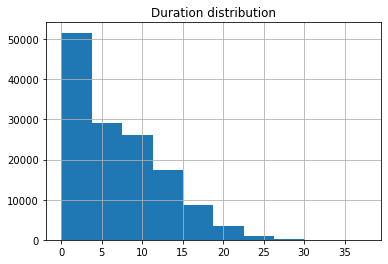

In [4]:
df_calls['duration'].hist()
plt.title('Duration distribution')
plt.show()

In [5]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [6]:
df_int = pd.read_csv('megaline_internet.csv') 
df_int.head(50)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


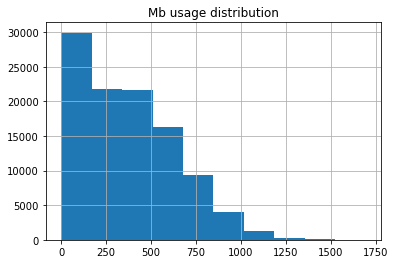

In [7]:
df_int['mb_used'].hist()
plt.title('Mb usage distribution')
plt.show()

In [8]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [9]:
df_int.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [10]:
df_mes = pd.read_csv('megaline_messages.csv') 
df_mes.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [11]:
df_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
df_plans = pd.read_csv('megaline_plans.csv') 
df_plans.head(5)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [13]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [14]:
df_users = pd.read_csv('megaline_users.csv') 
df_users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [15]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
df_users['plan'].value_counts()

surf        339
ultimate    161
Name: plan, dtype: int64

In [17]:
df = df_users['city'].value_counts()

In [18]:
df

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Albany-Schenectady-Troy, NY MSA                     1
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Jacksonville, FL MSA                                1
El Paso, TX MSA                                     1
Cape Coral-Fort Myers, FL MSA                       1
Name: city, Length: 73, dtype: int64

In [19]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


### Conclusion

We have 5 files. No missing values in it.
All types of data is suitable. Just later group by ID.
In files no duplicates, values are unique.
No reason to change anything for now.



We don't have missing values in the files, only 0. Probably it's falied connections in internet traffic and missing/cancelled calls in calls file. We don't have any additional information to identify this ID's as missed, or something else that we need to fill in or delete from the file. Seems more reasonable to keep it as it is.

## Step 2. Prepare the data

* 		Convert the data to the necessary types

* 		Find and eliminate errors in the data

In [20]:
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
187,1187,Tanner,Goodman,49,"Austin-Round Rock-Georgetown, TX MSA",2018-02-20,surf,NaN
452,1452,Miguel,Sparks,32,"Tucson, AZ MSA",2018-12-29,surf,NaN
324,1324,Romana,Moore,18,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,surf,NaN
249,1249,Kelly,Goodman,41,"Cincinnati, OH-KY-IN MSA",2018-05-14,ultimate,NaN
213,1213,Carl,Newman,47,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-11-25,ultimate,NaN


In [21]:
df_calls['call_date']= pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [22]:
df_int['session_date']= pd.to_datetime(df_int['session_date'], format='%Y-%m-%d')

In [23]:
df_mes['message_date']= pd.to_datetime(df_mes['message_date'], format='%Y-%m-%d')

In [24]:
df_users['reg_date']= pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [25]:
df_users['churn_date']= pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [26]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [27]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

In [28]:
df_int['month'] = pd.DatetimeIndex(df_int['session_date']).month

In [29]:
df_mes['month'] = pd.DatetimeIndex(df_mes['message_date']).month

In [30]:
df_users['month_reg'] = pd.DatetimeIndex(df_users['reg_date']).month

In [31]:
df_users['month_churn'] = pd.DatetimeIndex(df_users['churn_date']).month

In [32]:
df_users.head(2)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_reg,month_churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN


All dates in a suitable format now. Related to 2018 year. Churn dates are only in a second half of the year.

For each user, find:
* 		The number of calls made and minutes used per month
* 		The number of text messages sent per month
* 		The volume of data per month
* 		The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

1. Calculated for each user: for each month total minutes, messages, gb of data 
2. Merged three datasets
3. Function to calculate the revenue

In [33]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)

In [34]:
df_calls.head(3)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12


In [35]:
df_calls_group = df_calls.groupby(['user_id', 'month'])

In [36]:
print(len(df_calls_group))
df_calls_group.head(2)

2258


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
16,1001_0,1001,2018-09-06,11.0,9
17,1001_1,1001,2018-10-12,1.0,10
18,1001_2,1001,2018-10-17,16.0,10
...,...,...,...,...,...
137535,1499_4,1499,2018-10-05,1.0,10
137536,1499_5,1499,2018-12-17,0.0,12
137539,1499_8,1499,2018-12-21,6.0,12
137540,1499_9,1499,2018-09-18,0.0,9


In [37]:
calls_pivot = df_calls.pivot_table(index=['user_id', 'month'],
                              values='duration', aggfunc='sum')

In [38]:
calls_pivot.head(10)

duration
user_id month          
1000    12        124.0
1001    8         182.0
        9         315.0
        10        393.0
        11        426.0
        12        412.0
1002    10         59.0
        11        386.0
        12        384.0
1003    12       1104.0

In [39]:
df_int.head(3)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12


In [40]:
int_pivot = df_int.pivot_table(index=['user_id', 'month'],
                              values='mb_used', aggfunc='sum')

In [41]:
int_pivot.head(10)

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
        12     19369.18
1002    10      6552.01
        11     19345.08
        12     14396.24
1003    12     27044.14

In [42]:
df_mes.head(3)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12


In [43]:
mes_pivot = df_mes.pivot_table(index=['user_id', 'month'],
                              values='id', aggfunc='count')

In [44]:
mes_pivot

id
user_id month    
1000    12     11
1001    8      30
        9      44
        10     53
        11     36
...            ..
1496    9      21
        10     18
        11     13
        12     11
1497    12     50

[1806 rows x 1 columns]

In [45]:
mes_pivot.columns = ['sms']

In [46]:
total1= pd.merge(left = calls_pivot, 
                right = int_pivot, how='outer',on=['user_id', 'month']).fillna(0)
total2=pd.merge(left = total1 , 
                right = mes_pivot, how='outer',on=['user_id', 'month']).fillna(0)

In [47]:
total2

duration   mb_used   sms
user_id month                          
1000    12        124.0   1901.47  11.0
1001    8         182.0   6919.15  30.0
        9         315.0  13314.82  44.0
        10        393.0  22330.49  53.0
        11        426.0  18504.30  36.0
...                 ...       ...   ...
1349    10          0.0  13093.55  76.0
        11          0.0  17128.26  72.0
        12          0.0  13039.91  61.0
1361    5           0.0   1519.69   2.0
1482    10          0.0      0.00   2.0

[2293 rows x 3 columns]

In [48]:
total3=pd.merge(left = total2 , 
                right = df_users[['user_id', 'plan']] , how='outer',on='user_id').fillna(0)

In [49]:
total3.head(10)

,user_id,duration,mb_used,sms,plan
0,1000,124.0,1901.47,11.0,ultimate
1,1001,182.0,6919.15,30.0,surf
2,1001,315.0,13314.82,44.0,surf
3,1001,393.0,22330.49,53.0,surf
4,1001,426.0,18504.30,36.0,surf
5,1001,412.0,19369.18,44.0,surf
6,1002,59.0,6552.01,15.0,surf
7,1002,386.0,19345.08,32.0,surf
8,1002,384.0,14396.24,41.0,surf
9,1003,1104.0,27044.14,50.0,surf


In [50]:
total3['mb_used'] = total3['mb_used']/1024

In [51]:
total3['mb_used'] = total3['mb_used'].apply(np.ceil)

In [52]:
total3.head(10)

,user_id,duration,mb_used,sms,plan
0,1000,124.0,2.0,11.0,ultimate
1,1001,182.0,7.0,30.0,surf
2,1001,315.0,14.0,44.0,surf
3,1001,393.0,22.0,53.0,surf
4,1001,426.0,19.0,36.0,surf
5,1001,412.0,19.0,44.0,surf
6,1002,59.0,7.0,15.0,surf
7,1002,386.0,19.0,32.0,surf
8,1002,384.0,15.0,41.0,surf
9,1003,1104.0,27.0,50.0,surf


In [53]:
print(len(total3))

2303


In [54]:
def revenue (row):
    if row['plan'] == 'surf':
        if row['duration'] > 500:
            calls_cost = (row['duration'] - 500)*0.03
        else:
            calls_cost = 0
        if row['sms'] > 50:
            sms_cost = (row['sms'] - 50)*0.03
        else:
            sms_cost = 0
        if row['mb_used'] > 15:
            mb_used_cost = (row['mb_used'] - 15)*10
        else:
            mb_used_cost = 0
        total_cost = calls_cost + sms_cost + mb_used_cost + 20
    if row['plan'] == 'ultimate':
        if row['duration'] > 3000:
            calls_cost = (row['duration'] - 3000)*0.01
        else:
            calls_cost = 0
        if row['sms'] > 1000:
            sms_cost = (row['sms'] - 1000)*0.01
        else:
            sms_cost = 0
        if row['mb_used'] > 30:
            mb_used_cost = (row['mb_used'] - 30)*7
        else:
            mb_used_cost = 0
        total_cost = calls_cost + sms_cost + mb_used_cost + 70
    return total_cost

In [55]:
total3['revenue'] = total3.apply(revenue, axis=1)

In [56]:
total3.head(10)

,user_id,duration,mb_used,sms,plan,revenue
0,1000,124.0,2.0,11.0,ultimate,70.00
1,1001,182.0,7.0,30.0,surf,20.00
2,1001,315.0,14.0,44.0,surf,20.00
3,1001,393.0,22.0,53.0,surf,90.09
4,1001,426.0,19.0,36.0,surf,60.00
5,1001,412.0,19.0,44.0,surf,60.00
6,1002,59.0,7.0,15.0,surf,20.00
7,1002,386.0,19.0,32.0,surf,60.00
8,1002,384.0,15.0,41.0,surf,20.00
9,1003,1104.0,27.0,50.0,surf,158.12


### Conclusion 

Each  call was rounded up to one minute. For web traffic, Mb rounded up and conberted to Gb.
Function for revenue based on plan description:
Surf
Monthly charge: $20

500 monthly minutes, 50 texts, and 15 GB of data

After exceeding the package limits:

1 minute: 3 cents

1 text message: 3 cents

1 GB of data: $10

Ultimate

Monthly charge: $70

3000 monthly minutes, 1000 text messages, and 30 GB of data

After exceeding the package limits:

1 minute: 1 cent

1 text message: 1 cent

1 GB of data: $7


## Analyze the data

Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation - using describe method. Plot histograms, for each column, dividing by plans. Describe the distributions.

In [57]:
total3.describe()

,user_id,duration,mb_used,sms,revenue
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,1246.214937,427.419453,16.797221,33.022579,64.245410
std,143.044136,237.490294,7.857946,34.065907,46.579107
min,1000.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,262.500000,12.000000,3.000000,23.390000
50%,1245.000000,424.000000,17.000000,25.000000,70.000000
75%,1368.000000,571.500000,21.000000,51.000000,70.000000
max,1499.000000,1510.000000,70.000000,266.000000,590.370000


In [58]:
x = total3['duration']
variance = np.var(x)
print(variance)

56377.14928723869


In [59]:
x = total3['mb_used']
variance = np.var(x)
print(variance)

61.72049596808848


In [60]:
x = total3['sms']
variance = np.var(x)
print(variance)

1159.9821215281424


In [61]:
x = total3['revenue']
variance = np.var(x)
print(variance)

2168.671152838555


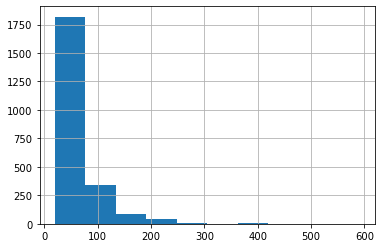

In [62]:
total3['revenue'].hist()
plt.show() 

In [63]:
total3_surf = total3.query('plan == "surf"')
total3_surf.describe()

,user_id,duration,mb_used,sms,revenue
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000
mean,1242.940469,427.120329,16.607346,31.041165,60.551729
std,139.200115,235.490079,7.899502,33.557683,55.339379
min,1001.000000,0.000000,0.000000,0.000000,20.000000
25%,1120.000000,269.000000,12.000000,3.000000,20.000000
50%,1245.000000,424.000000,17.000000,24.000000,40.180000
75%,1358.000000,576.000000,21.000000,47.000000,80.315000
max,1499.000000,1510.000000,70.000000,266.000000,590.370000


In [64]:
total3_ult = total3.query('plan == "ultimate"')
total3_ult.describe()

,user_id,duration,mb_used,sms,revenue
count,724.000000,724.000000,724.000000,724.000000,724.000000
mean,1253.356354,428.071823,17.211326,37.343923,72.301105
std,150.941802,241.958423,7.755841,34.782576,11.364839
min,1000.000000,0.000000,0.000000,0.000000,70.000000
25%,1126.000000,258.750000,13.000000,6.000000,70.000000
50%,1246.000000,421.500000,17.000000,30.000000,70.000000
75%,1401.000000,564.250000,21.000000,60.250000,70.000000
max,1497.000000,1369.000000,46.000000,166.000000,182.000000


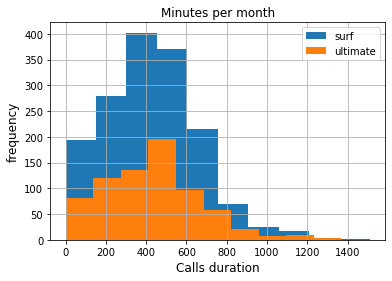

In [65]:
total3_surf['duration'].hist()
total3_ult['duration'].hist()

plt.xlabel("Calls duration", fontsize=12)  
plt.ylabel("frequency", fontsize=12)

labels= ["surf","ultimate"]
plt.legend(labels)

title = 'Minutes per month'
plt.title(title)
plt.show()

Disrtibution for calls is close to normal, most of the users 'use' 200-600 min per month. standard deviation is nearly equal 222 for surf and 228 for ultimate

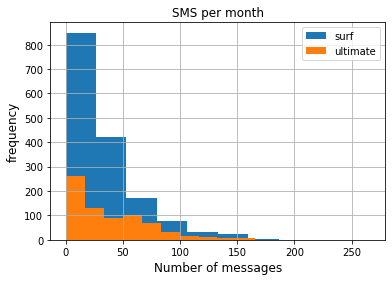

In [66]:
total3_surf['sms'].hist()
total3_ult['sms'].hist()

plt.xlabel("Number of messages", fontsize=12)  
plt.ylabel("frequency", fontsize=12)

labels= ["surf","ultimate"]
plt.legend(labels)

title = 'SMS per month'
plt.title(title)
plt.show()

Disrtibutions for sms are skewed to the right. standard deviations are 33 and 34 for surf and ultimate accordingly.

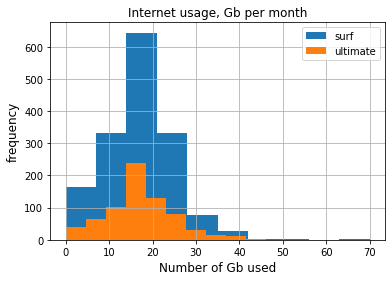

In [67]:
total3_surf['mb_used'].hist()
total3_ult['mb_used'].hist()

plt.xlabel("Number of Gb used", fontsize=12)  
plt.ylabel("frequency", fontsize=12)

labels= ["surf","ultimate"]
plt.legend(labels)

title = 'Internet usage, Gb per month'
plt.title(title)
plt.show()

Disrtibution for Internet usage is close to normal, most of the people use 12-21 gb per month. standard deviation is nearly equal 7.7 for surf and 7.8 for ultimate

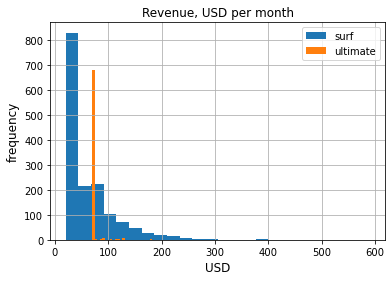

In [68]:
total3_surf['revenue'].hist(bins = 24)
total3_ult['revenue'].hist(bins = 24)

plt.xlabel("USD", fontsize=12)  
plt.ylabel("frequency", fontsize=12)

labels= ["surf","ultimate"]
plt.legend(labels)

title = 'Revenue, USD per month'
plt.title(title)
plt.show()

 Distributions are skewed to the right. Mean for Surf is 60, with standard deviation 55. For Ultimate is almost equal to the monthly charge, with standard deviation - 11. Much more users of surf plan paid additional to monthly charge, comparing to ultimate plan.

In [69]:
dop_surf = total3_surf.query('revenue >= 21')

In [70]:
print(len(dop_surf))

1065


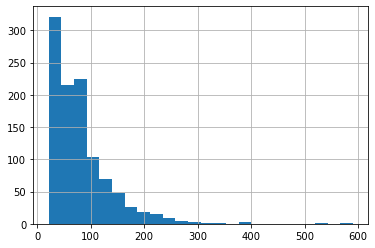

In [71]:
dop_surf['revenue'].hist(bins=24)
plt.show()

In [72]:
dop_ult = total3_ult.query('revenue >= 71')

In [73]:
print(len(dop_ult))

41


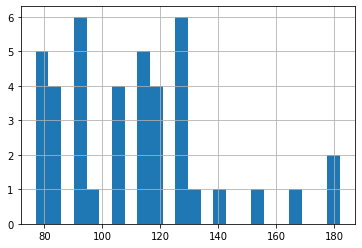

In [74]:
dop_ult['revenue'].hist(bins=24)
plt.show()


In [75]:
rev_user = total3.pivot_table(index = 'user_id', values = 'revenue', aggfunc = 'sum')
rev_user.describe()

,revenue
count,500.000000
mean,295.914360
std,271.220847
min,20.000000
25%,92.677500
50%,210.000000
75%,420.000000
max,1830.860000


In [76]:
rev_user_surf = total3_surf.pivot_table(index = 'user_id', values = 'revenue', aggfunc = 'sum')
rev_user_surf.describe()

,revenue
count,339.000000
mean,282.038879
std,289.766920
min,20.000000
25%,81.735000
50%,195.900000
75%,374.450000
max,1830.860000


In [77]:
rev_user_ult = total3_ult.pivot_table(index = 'user_id', values = 'revenue', aggfunc = 'sum')
rev_user_ult.describe()

,revenue
count,161.000000
mean,325.130435
std,225.333007
min,70.000000
25%,140.000000
50%,280.000000
75%,490.000000
max,1309.000000


## Test the hypotheses

* The average revenue from users of Ultimate and Surf calling plans differs.
* 		The average revenue from users in NY-NJ area is different from that of the users from other regions.
You decide what alpha value to use.
Explain:
* 		How you formulated the null and alternative hypotheses.
* 		What criterion you used to test the hypotheses and why.

### Ultimate and Surf
H0: The average revenue from users of Ultimate and Surf calling plans are equal

H1: The average revenue from users of Ultimate and Surf calling plans are not equal

Which means that average revenue from users of Ultimate plan and Surf plan should be the same. While we can see by describe method that mean for surf is around 280 USD and for ult is around 325 USD

Hypothesis on the equality of two population to compare the means of two different statistical populations.
Alpha: 0.5 (try with standard)
To get more accurate results we set equal_var to False as the variances of the statistical populations from which the samples are taken are not equal.

In [78]:
surf_mean = rev_user_surf['revenue']
ult_mean = rev_user_ult['revenue']

In [79]:
alpha = 0.06  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(surf_mean, ult_mean, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.07012859276740324
We can't reject the null hypothesis


The average revenue from users of Ultimate and Surf calling plans differs slightly.

The p-value tells us that although the average amounts for the two channels are different, there is a 5.9% probability of randomly getting a difference that size or larger. This probability is little bit higher to conclude that there is a significant difference between the average amounts spent.

### NY-NJ area
H0: The average revenue from users in NY-NJ area is equal to the users from other regions

H1: The average revenue from users in NY-NJ area is not equal to the users from other regions

Which means that mean of revenue from users in NY-NJ area should be equal to 'general' mean

In [80]:
total_region=pd.merge(left = total3 , 
                right = df_users[['user_id', 'age', 'city']] , how='outer',on='user_id').fillna(0)

In [81]:
print(len(total_region))

2303


In [82]:
total_region.head(5)

,user_id,duration,mb_used,sms,plan,revenue,age,city
0,1000,124.0,2.0,11.0,ultimate,70.00,45,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,182.0,7.0,30.0,surf,20.00,28,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,315.0,14.0,44.0,surf,20.00,28,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,393.0,22.0,53.0,surf,90.09,28,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,426.0,19.0,36.0,surf,60.00,28,"Seattle-Tacoma-Bellevue, WA MSA"


In [83]:
sample_1 = total_region.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [84]:
print(len(sample_1))

378


In [85]:
sample_1.tail(5)

,user_id,duration,mb_used,sms,plan,revenue,age,city
2264,1080,0.0,25.0,64.0,surf,120.42,45,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2265,1080,0.0,30.0,59.0,surf,170.27,45,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2266,1080,0.0,33.0,50.0,surf,200.00,45,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2267,1080,0.0,24.0,61.0,surf,110.33,45,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2297,1275,0.0,0.0,0.0,ultimate,70.00,33,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [86]:
sample_1['city'].unique()

array(['New York-Newark-Jersey City, NY-NJ-PA MSA'], dtype=object)

In [87]:
sample_2 = total_region.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')

In [88]:
print(len(sample_2))

1925


In [89]:
sample_2.sample(5)

,user_id,duration,mb_used,sms,plan,revenue,age,city
2204,1489,318.0,13.0,59.0,surf,20.27,72,"Detroit-Warren-Dearborn, MI MSA"
853,1182,203.0,19.0,2.0,surf,60.00,39,"Charlotte-Concord-Gastonia, NC-SC MSA"
1234,1264,312.0,14.0,53.0,ultimate,70.00,69,"Los Angeles-Long Beach-Anaheim, CA MSA"
1263,1273,324.0,14.0,55.0,ultimate,70.00,25,"Baton Rouge, LA MSA"
1097,1239,581.0,14.0,0.0,surf,22.43,24,"Fresno, CA MSA"


In [90]:
sample_1['revenue'].median()

51.845

In [91]:
sample_1['revenue'].mean()

59.9480158730159

In [92]:
sample_2['revenue'].mean()

65.08926233766229

In [93]:
sample_2['revenue'].median()

70.0

In [94]:
x_S1 = sample_1['revenue']
variance = np.var(x_S1)
print(variance)

1885.7843645817597


In [95]:
x_S2 = sample_2['revenue']
variance = np.var(x_S2)
print(variance)

2219.881380131205


Variances of two samples are not equal, so we adding third parameter - 'equal_var=False'

In [96]:
sample_1 = sample_1['revenue']

sample_2 = sample_2['revenue']

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.03870322661292944
We reject the null hypothesis


We reject the null hypothesis - average of sample_1 is not equal to average of sample_2
The average revenue from users in NY-NJ area is different from that of the users from other regions.
The average revenue from users in NY-NJ area is less than of the users from other regions.


## Step 5. Overall conclusion

Files show data of a sample of 500 users who used Megaline services in 2018. Three separate files with information of calls, SMS, and internet usage. We don't have missing values in the files, only 0. Probably it is failed connections in internet traffic and missing/canceled calls in the calls file. We don't have any additional information to identify these IDs as missed or something else that we need to fill in or delete from the file. Seems more reasonable to keep it as it is. In files no duplicates, values are unique. No reason to change or remove anything.

The company provides two prepaid plans - Surf and Ultimate. Preliminary analysis of the plans based on 500 Megaline clients showed that clients from the different cities on average have a call duration of 6.7 min with 400 min per month, 16GB of internet usage and 33 SMS sent. Average revenue - 63 USD/month.

68% of the clients are using plan 'surf', 32% - 'ultimate'. For the analysis data were grouped per user per month and rounded according to plans description to calculate revenue: each call is rounded up to minutes, web traffic for the month is rounded up to Gb. For each parameter were calculated the mean, dispersion, and standard deviation, histograms were plotted. Distribution for calls is close to normal, most of the users are making calls around 200-600 min per month. standard deviation is nearly equal to 222 for surf and 228 for ultimate. Distributions for SMS are skewed to the right. standard deviations are 33 and 34 for surf and ultimate accordingly. Distribution for Internet usage is close to normal, most of the people use 12-21 Gb per month. standard deviation is nearly equal to 7.7 for surf and 7.8 for ultimate Distributions of revenue are skewed to the right. The mean for surf is 60, with a standard deviation of 55. For Ultimate is almost equal to the monthly charge, with a standard deviation of - 11. Much more users of surf plan paid additional to the monthly charge, compared to the ultimate plan.

Having the monthly charge of 20 USD, users of the 'surf' plan on average brings 60 USD per month. On average they spend 427 min of calls, 30 SMS, and 16 Gb. Plan 'Ultimate' has a monthly charge of 70 USD, users on average bring 72 USD per month. On average they spend 428 min of calls, 37 SMS, and 17 Gb. Numbers of usage looks quite similar, while 'ultimate' users most often keep inside package limits, users of 'surf' are exceeding the package limits much more often. The average revenue from users of Ultimate and Surf calling plans differs not so significantly as expected, as the additional payment for exceeding the package limits are higher. But anyway revenue is still higher for plan 'Ultimate'. At the same time, the 'surf' plan is important as it attracts people who are not ready for high monthly payments and may not be ready to prepay for the same amount of package as they use in fact. Also, hypotheses tests based on the regions showed that the average revenue from users in the NY-NJ area is lower than that of the users from other regions.